# Analysis of variance (ANOVA)

In [56]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [58]:
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

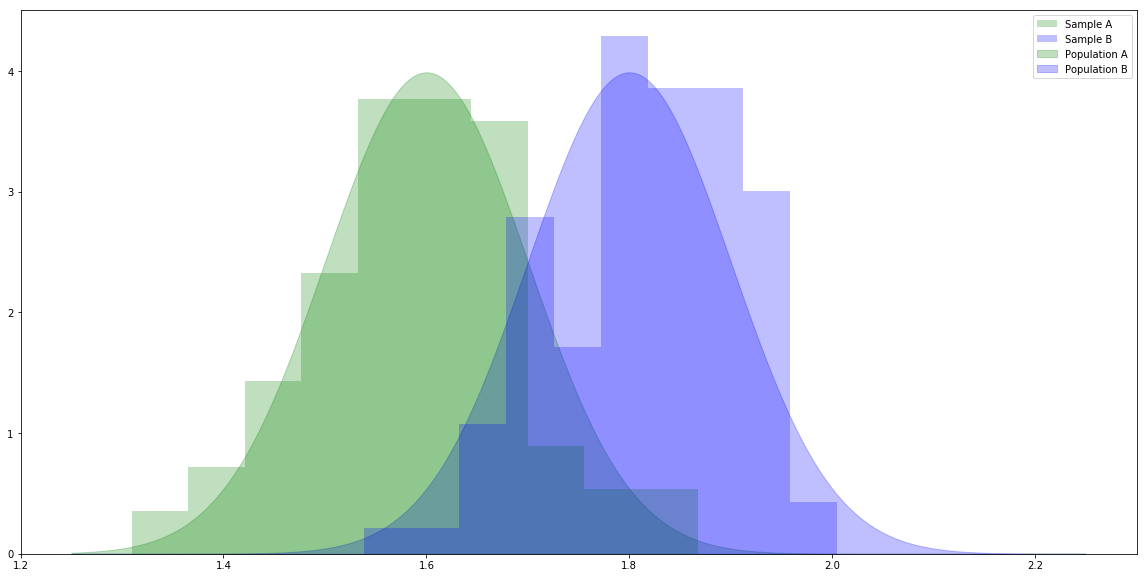

In [59]:
x = np.linspace(1.25, 2.25, 1000)

pdfA = stats.norm.pdf(x, popA['m'], popA['s'])
pdfB = stats.norm.pdf(x, popB['m'], popB['s'])

plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

plt.legend()
plt.show()

In [72]:
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=-16.22292229010218, pvalue=3.3084668440123785e-38)

![Type I and Type II images from https://en.wikipedia.org/wiki/Type_I_and_type_II_errors](https://github.com/ianmcloughlin/images/raw/master/typeitypeii.png)

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [65]:
s = df[df['species'] == 'setosa']
r = df[df['species'] == 'versicolor']
a = df[df['species'] == 'virginica']

In [68]:
print(stats.ttest_ind(s['petal_length'], r['petal_length']))
print(stats.ttest_ind(s['petal_length'], a['petal_length']))
print(stats.ttest_ind(r['petal_length'], a['petal_length']))

print(stats.ttest_ind(s['petal_width'], r['petal_width']))
print(stats.ttest_ind(s['petal_width'], a['petal_width']))
print(stats.ttest_ind(r['petal_width'], a['petal_width']))

print(stats.ttest_ind(s['sepal_length'], r['sepal_length']))
print(stats.ttest_ind(s['sepal_length'], a['sepal_length']))
print(stats.ttest_ind(r['sepal_length'], a['sepal_length']))

print(stats.ttest_ind(s['sepal_width'], r['sepal_width']))
print(stats.ttest_ind(s['sepal_width'], a['sepal_width']))
print(stats.ttest_ind(r['sepal_width'], a['sepal_width']))

Ttest_indResult(statistic=-39.46866259397272, pvalue=5.717463758170621e-62)
Ttest_indResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71)
Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)
Ttest_indResult(statistic=-34.01237858829048, pvalue=4.589080615710866e-56)
Ttest_indResult(statistic=-42.738229672411165, pvalue=3.582719502316063e-65)
Ttest_indResult(statistic=-14.625367047410148, pvalue=2.2304090710248333e-26)
Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)
Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)
Ttest_indResult(statistic=-5.629165259719801, pvalue=1.7248563024547942e-07)
Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)
Ttest_indResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09)
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)


[Wikipedia: Multiple Comparisons Problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)

[Multiple t tests and Type I error](http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple%20t%20tests.htm)

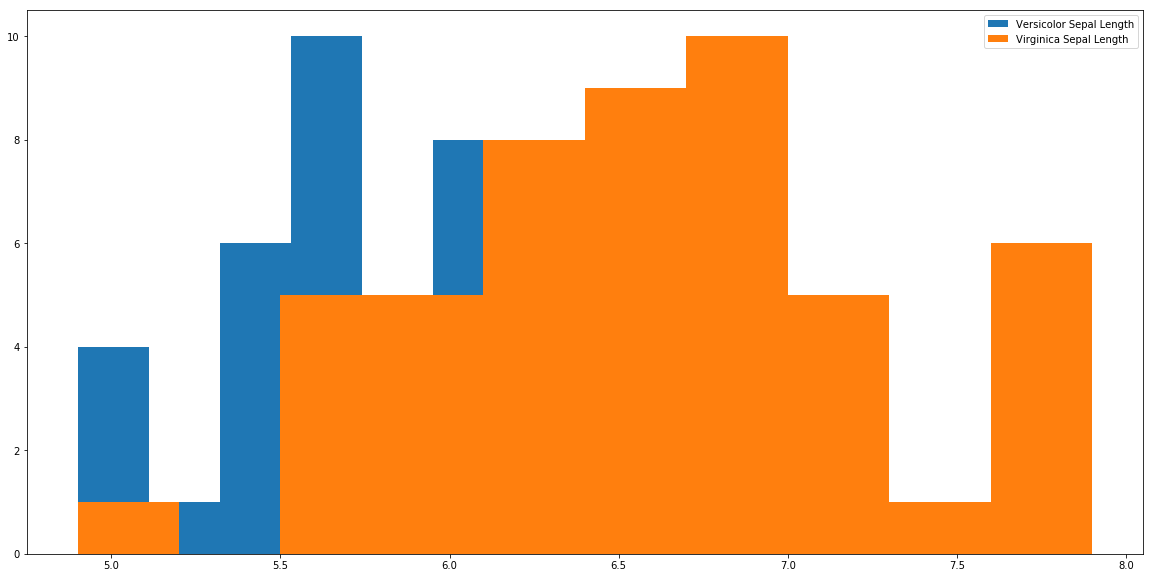

In [77]:
plt.hist(r['sepal_length'], label='Versicolor Sepal Length')
plt.hist(a['sepal_length'], label='Virginica Sepal Length')

plt.legend()

plt.show()

In [69]:
1- ((0.95)**12)

0.45963991233736334

In [73]:
stats.f_oneway(s['petal_length'], r['petal_length'], a['petal_length'])

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

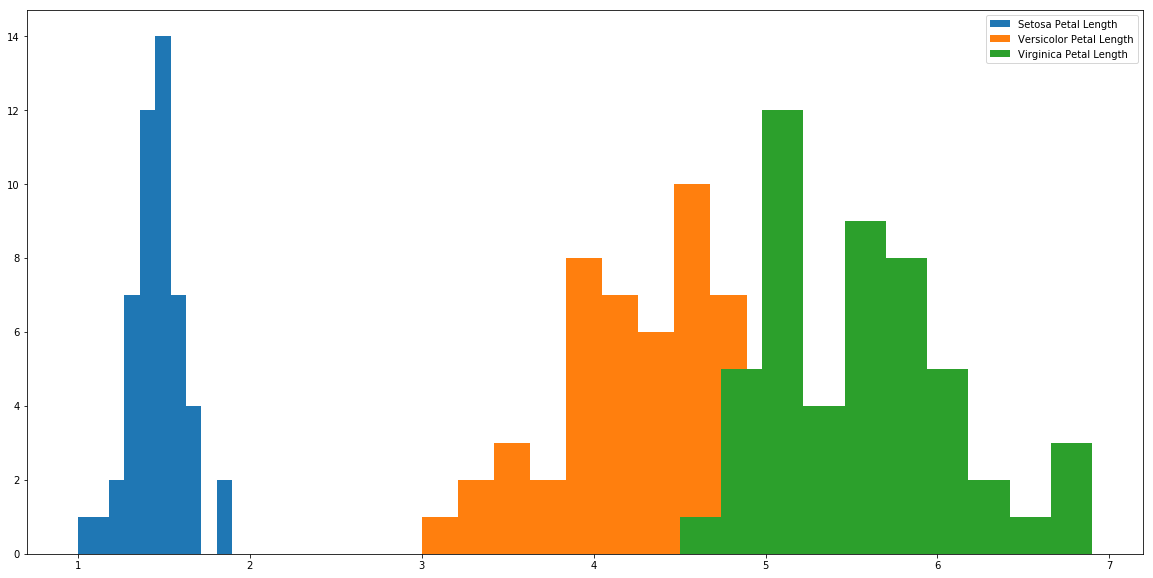

In [74]:
plt.hist(s['petal_length'], label='Setosa Petal Length')
plt.hist(r['petal_length'], label='Versicolor Petal Length')
plt.hist(a['petal_length'], label='Virginica Petal Length')

plt.legend()

plt.show()

## End